In [1]:
from util.visualise import *

/home/dillon/anaconda3/envs/goose/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PAPER_DIR = str(Path.home())+"/papers/24-aaai-goose/paper"

PLOT_DIR = f"{PAPER_DIR}/plots"
PLOT_DIR

'/home/dillon/papers/24-aaai-goose/paper/plots'

In [7]:
L=4
aggr="max"
H=64

max_metric = 1e7
metric = "expanded"
PAIRS = [
    ("ldg-el dd", "hff"),
    ("sdg-el di", "hff"),
         ]

In [33]:
def plots_with_metric(metric, max_metric):
  for config_x, config_y in PAIRS:
      for domain in GOOSE_DOMAINS:
          xs = []
          ys = []

          problem_pddls = os.listdir(f"../benchmarks/goose/{domain}/test")
          for problem_pddl in problem_pddls:
              problem_name = os.path.basename(problem_pddl).replace(".pddl", "")

              key = (domain, problem_name)
              
              config = config_x
              config_toks = config.split()
              assert len(config_toks) == 2
              rep, train_type = tuple(config_toks)
              p = 20 if train_type == "di" else 10
              f = f'logs/test/{problem_name}_{train_type}_{rep}_{domain}_L{L}_H{H}_{aggr}_p{p}_r0.log'
              x = min(scrape_search_log(f)[metric], max_metric)
              
              config = config_y
              f = f'logs/{config}/{domain}_{problem_name}_{config}.log'
              y = min(scrape_search_log(f)[metric], max_metric)
              
              
              if y == -1:
                y = max_metric
              if x == -1:
                x = max_metric

              xs.append(x)
              ys.append(y)
          
          plt.scatter(xs, ys, label=domain, marker='x', alpha=0.8)
      plt.plot([1, max_metric], [1, max_metric], linestyle='dashed', color='k', zorder=0)
      plt.xscale('log')
      plt.yscale('log')
      plt.xlim(left=10)
      plt.ylim(bottom=10)
      plt.plot([1, max_metric], [max_metric, max_metric], alpha=0.5, color='k')
      plt.plot([max_metric, max_metric], [1, max_metric], alpha=0.5, color='k')
      plt.legend()
      plt.title(f"{config_x.replace(' ', '_')}  vs  {config_y.replace(' ', '_')}")
      plt.tight_layout()
      plt.savefig(f"{PLOT_DIR}/{metric}-{config_x.replace(' ', '_')}-vs-{config_y.replace(' ', '_')}.pdf")
      plt.show()
      plt.clf()

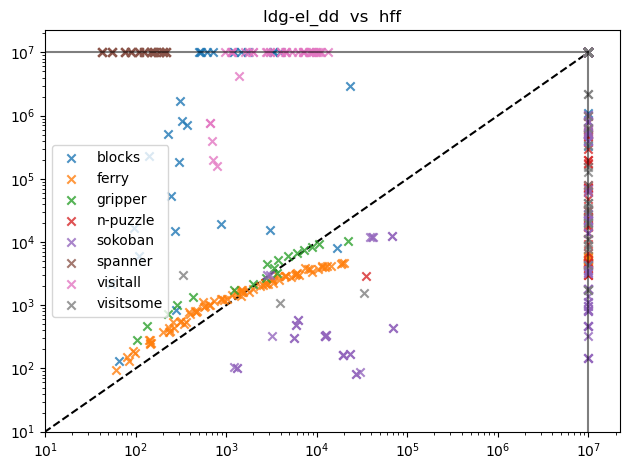

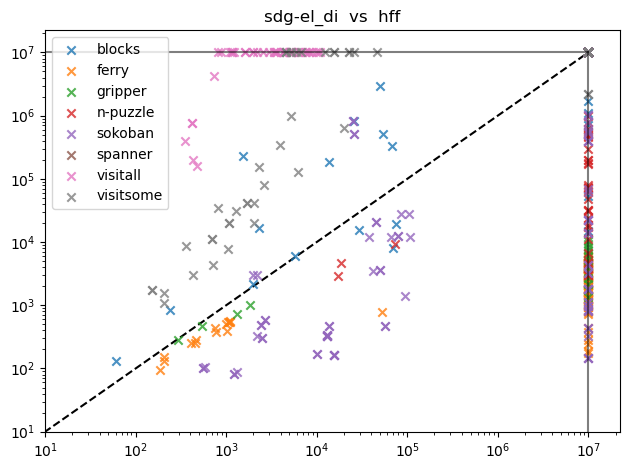

<Figure size 640x480 with 0 Axes>

In [34]:
max_metric = 1e7
metric = "expanded"
plots_with_metric(metric, max_metric)

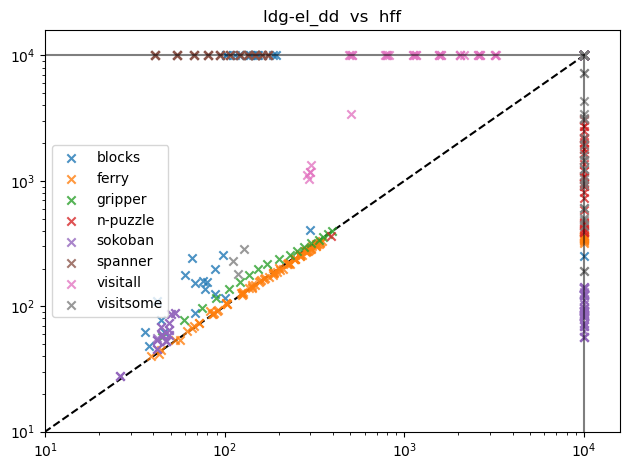

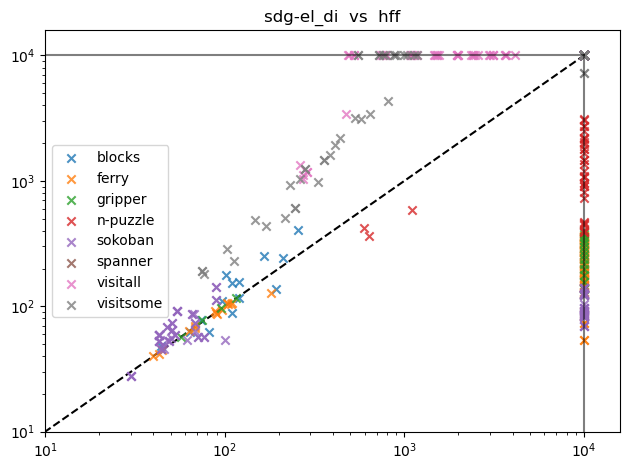

<Figure size 640x480 with 0 Axes>

In [35]:
max_metric = 1e4
metric = "cost"
plots_with_metric(metric, max_metric)